In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Best Crop Prediction.csv')

In [3]:
dataset

,Min. Temperature(C),Humidity(%),Rainfall,Crop
0,16,85,150,Rice
1,21,95,100,Wheat
2,15,80,140,Rice
3,20,95,150,Wheat
4,23,70,200,Rice
5,25,87,160,Wheat
6,22,79,135,Rice
7,24,93,145,Wheat
8,19,99,210,Rice
9,25,87,190,Wheat


In [4]:
x = dataset.iloc[:, [0,1,2]].values
x

array([[ 16,  85, 150],
       [ 21,  95, 100],
       [ 15,  80, 140],
       [ 20,  95, 150],
       [ 23,  70, 200],
       [ 25,  87, 160],
       [ 22,  79, 135],
       [ 24,  93, 145],
       [ 19,  99, 210],
       [ 25,  87, 190],
       [ 22,  60, 200],
       [ 24,  93, 145]], dtype=int64)

In [5]:
y = dataset.iloc[:, 3].values

In [6]:
y

array(['Rice', 'Wheat', 'Rice', 'Wheat', 'Rice', 'Wheat', 'Rice', 'Wheat',
       'Rice', 'Wheat', 'Rice', 'Wheat'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:
y=lb.fit_transform(y)
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0])

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 1]], dtype=int64)

In [26]:
y_predict = classifier.predict(np.array([[24,93,145]]))
y_predict

array([1])

In [23]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

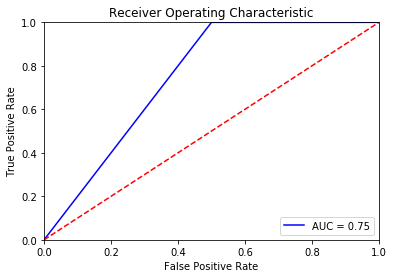

In [24]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6666666666666666